In [1]:
!pip install konlpy
!pip install numpy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from konlpy.tag import Kkma
from konlpy.tag import Okt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
#리뷰 데이터가 담겨있는 파일 열기
file=open('review.txt','r',encoding='UTF8')
text=file.readlines()
file.close()
print(0)
tex=''
for i in range(len(text)):
    tex+=text[i].strip()
okt=Okt()
print(0)
#text=okt.pos(text,norm=True,stem=True)
#for i in range(len(text)):
    #text[i]=text[i][0]
text=okt.phrases(tex)
print(text)
#불용어 제거
stop_words = "가득 그 단 한 두 세 번 조금 님  》《 즉 그 이래서 그래서 왜냐하면 하지만 그래서 그렇지만 응 ? 까지 전에 죠 란 만 해도 하지만 조금 아마 기필코 이후 이미 일 『  』 것 이다 이는 들 세요 알다 면 연 이니까 이기에 수 와 과 에 기 작 있다 도 을 를 오전 오후 오늘 내일 그제 이름 이 그 저 않습니다 왜냐하면 되기 를 은 , . 노 하 하는 이 가 은 는 하는 왜냐하면 하기 에서 라는 의 하다 않다 또" 
stop_words=stop_words.split(' ') 
stops=set(stop_words)
meaningful_words = [w for w in text if not w in stops]

0
0
['이 소설', '이유', '내 습관', '내 습관 때문', '전 인터넷', '리뷰', '버릇', '검색', '이 작품', '이 작품의 서평', '실존주의', '부조리', '부조리 철학', '등 어려운 단어', '거부감', '그런 서평', '의미', '문학', '전공', '독자들', '그런 리뷰', '보고', '보고 책', '결심', '생각', '생각한다면 글쎄', '책장', '서평', '이해', '이해할 수', '바탕', '사상', '감상', '도움', '그런 어려움', '불구', '아닌 제목', '아닌 제목 때문', '줄거리', '공간적 배경', '외국', '아닌 것', '제목', '이방인', 'tranger', '비유', '지은', '지은 것', '한국', '이 세상', '가끔', '때문', '동질감', '어떤 의도', '어떤 의도의 소설일지', '우울할 땐', '우울할 땐 우울한 작품', '위로', '말 수가', '말 수가 적은 주인공', '뫼르소', '어머니', '전보', '장례식', '슬픔', '보이지', '와중', '담배', '등의 행동', '그의 성격', '짐작케', '장례', '마치', '해변', '전 직장', '전 직장 동료', '마리', '하룻밤', '어머니의 죽음', '안중', '없는 듯', '없는 듯 그녀', '없는 듯 그녀와 영화', '가기', '레몽', '이웃', '여자', '복수', '위해', '위해 그', '편지', '편지 대필', '부탁', '거기', '이후', '이후 그녀', '그녀', '원하던 대로', '원하던 대로 구타', '역시', '역시 뫼르소', '어떠한 도덕적 책임', '뫼르소와 마리', '레몽의 친구', '마송', '별장', '휴가', '중 해변', '3명의', '3명의 아랍인', '3명의 아랍인 사내들', '그 아랍인', '그 아랍인 중', '그 아랍인 중 한 명', '구타', '구타했던 여자', '구타했던 여자의 오빠', '서로', '서로 그', '서로 그 사실', '신경전이', '아랍인', '바람', 

In [40]:
import pandas as pd
import gensim
# 파라메터값 지정
num_features = 200 # 문자 벡터 차원 수
min_word_count = 5 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context =5 # 문자열 창 크기
downsampling =  1e-3  # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(meaningful_words, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model
model.wv.vectors.shape
word_vectors_list = [model.wv[v] for v in model.wv.vocab.keys()]

In [41]:
print(word_vectors_list)

[array([-0.15872432,  0.03468406, -0.1049263 ,  0.11272903,  0.07827911,
       -0.05379549, -0.17814249, -0.13774191, -0.05402081,  0.10558989,
        0.15227632, -0.00434547,  0.08819905,  0.08218821, -0.04114969,
       -0.06709547, -0.0914457 ,  0.10521056, -0.05087837, -0.01350434,
       -0.05086438,  0.01495843,  0.11730984, -0.00139851,  0.02120623,
       -0.01327923,  0.00446262, -0.03863519, -0.10622744, -0.15518259,
        0.02855198,  0.05827567, -0.03856758,  0.14133058,  0.02348488,
       -0.00024116, -0.05892537,  0.08081298,  0.09400746,  0.03262716,
       -0.05641309, -0.03701295,  0.09641917, -0.02192045,  0.02149427,
       -0.01182266, -0.09770907, -0.08518352,  0.063644  ,  0.08143846,
       -0.1344651 ,  0.00154685, -0.08978412, -0.0521206 ,  0.11395882,
        0.01269385,  0.10514423,  0.00155008, -0.07503271, -0.07506154,
        0.02451603,  0.08029161,  0.00140647, -0.04746985, -0.02427361,
        0.14004917, -0.07871611, -0.04934484,  0.10102957, -0.0

In [35]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

In [36]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fm._rebuild()

plt.rc('font', family='NanumGothic')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


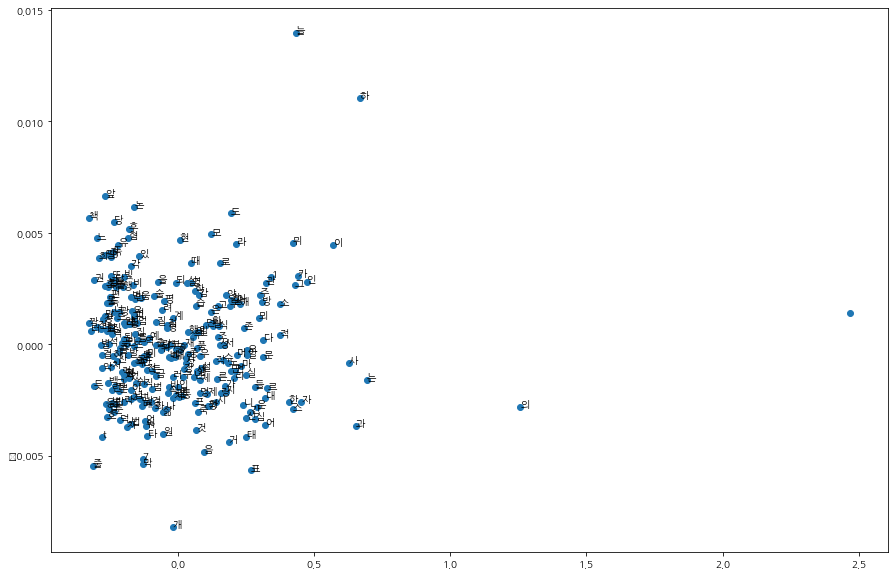

In [37]:
import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15,10))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)